## Loading

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [39]:
from sklearn.metrics import r2_score
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,precision_recall_fscore_support
import warnings
import os

In [40]:
df = pd.read_excel('data.xlsx')

In [41]:
df.head(20)

,Unnamed: 0,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,0,1,5,4,1,0,0,0.000,0.000,0.200,...,0.0,0.0,0.000,0.000,1,0,PL,PL,696,P2
1,1,2,1,0,1,0,0,0.000,0.000,1.000,...,0.0,0.0,0.000,0.000,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,2,3,8,0,8,1,0,0.125,0.000,1.000,...,0.0,0.0,0.000,0.000,1,0,ConsumerLoan,others,693,P2
3,3,5,3,2,1,0,0,0.000,0.000,0.333,...,0.0,0.0,0.000,0.000,0,0,AL,AL,753,P1
4,4,6,6,5,1,0,0,0.000,0.000,0.167,...,1.0,0.0,0.429,0.000,1,0,ConsumerLoan,PL,668,P3
5,5,8,6,4,2,0,0,0.000,0.000,0.333,...,0.0,0.0,0.000,0.000,0,0,ConsumerLoan,others,676,P2
6,6,9,1,0,1,0,0,0.000,0.000,1.000,...,0.0,0.0,0.000,0.000,0,0,ConsumerLoan,others,658,P4
7,7,11,7,2,5,1,0,0.143,0.000,0.714,...,0.0,1.0,0.000,0.333,0,0,CC,others,685,P2
8,8,13,2,2,0,0,0,0.000,0.000,0.000,...,0.0,0.0,0.000,0.000,0,0,ConsumerLoan,others,669,P2
9,9,14,2,1,1,1,0,0.500,0.000,0.500,...,0.0,0.0,0.000,0.000,0,0,ConsumerLoan,ConsumerLoan,687,P2


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  42064 non-null  int64  
 1   PROSPECTID                  42064 non-null  int64  
 2   Total_TL                    42064 non-null  int64  
 3   Tot_Closed_TL               42064 non-null  int64  
 4   Tot_Active_TL               42064 non-null  int64  
 5   Total_TL_opened_L6M         42064 non-null  int64  
 6   Tot_TL_closed_L6M           42064 non-null  int64  
 7   pct_tl_open_L6M             42064 non-null  float64
 8   pct_tl_closed_L6M           42064 non-null  float64
 9   pct_active_tl               42064 non-null  float64
 10  pct_closed_tl               42064 non-null  float64
 11  Total_TL_opened_L12M        42064 non-null  int64  
 12  Tot_TL_closed_L12M          42064 non-null  int64  
 13  pct_tl_open_L12M            420

In [43]:
df.describe()

,Unnamed: 0,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,...,pct_currentBal_all_TL,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,Credit_Score
count,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.00000,42064.000000,42064.000000,42064.000000,...,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000
mean,21031.500000,25649.827477,5.262980,2.967383,2.295597,0.812643,0.48992,0.179032,0.097783,0.577452,...,0.883693,0.102962,0.193063,0.219169,0.074833,0.195497,0.064186,0.252235,0.056580,679.326336
std,12142.975198,14844.173396,7.463383,6.141098,2.404086,1.383559,1.05892,0.278043,0.210957,0.366110,...,40.622275,0.303913,0.394707,0.395100,0.250658,0.367414,0.225989,0.434300,0.231042,21.133619
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,469.000000
25%,10515.750000,12776.750000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.286000,...,0.152000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,668.000000
50%,21031.500000,25706.500000,3.000000,1.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.545000,...,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,679.000000
75%,31547.250000,38518.250000,6.000000,3.000000,3.000000,1.000000,1.00000,0.333000,0.100000,1.000000,...,0.860000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,690.000000
max,42063.000000,51336.000000,235.000000,216.000000,47.000000,27.000000,19.00000,1.000000,1.000000,1.000000,...,6327.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,809.000000


In [44]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]

Series([], dtype: int64)

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df.replace(-99999.000, np.nan, inplace=True)

In [47]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]

Series([], dtype: int64)

In [48]:
print(df.isnull().sum().sum())

0


## Plots

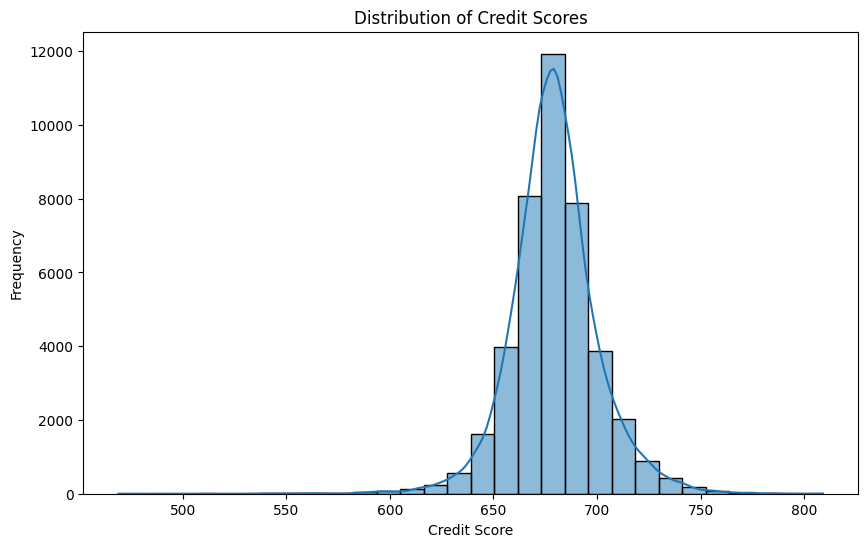

In [49]:
# Plotting to understand the data
# Distribution of Credit Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Credit_Score'], bins=30, kde=True)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

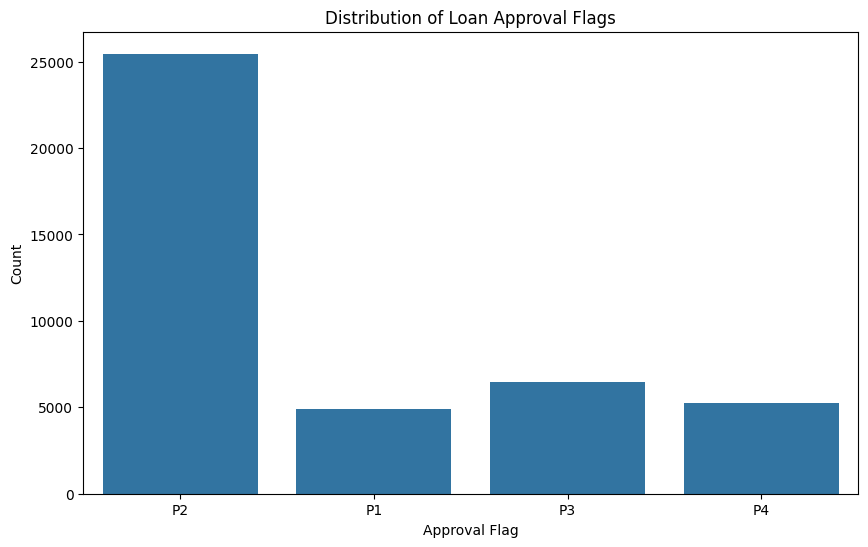

In [51]:
# Count plot for the Approved_Flag
plt.figure(figsize=(10, 6))
sns.countplot(x='Approved_Flag', data=df)
plt.title('Distribution of Loan Approval Flags')
plt.xlabel('Approval Flag')
plt.ylabel('Count')
plt.show()

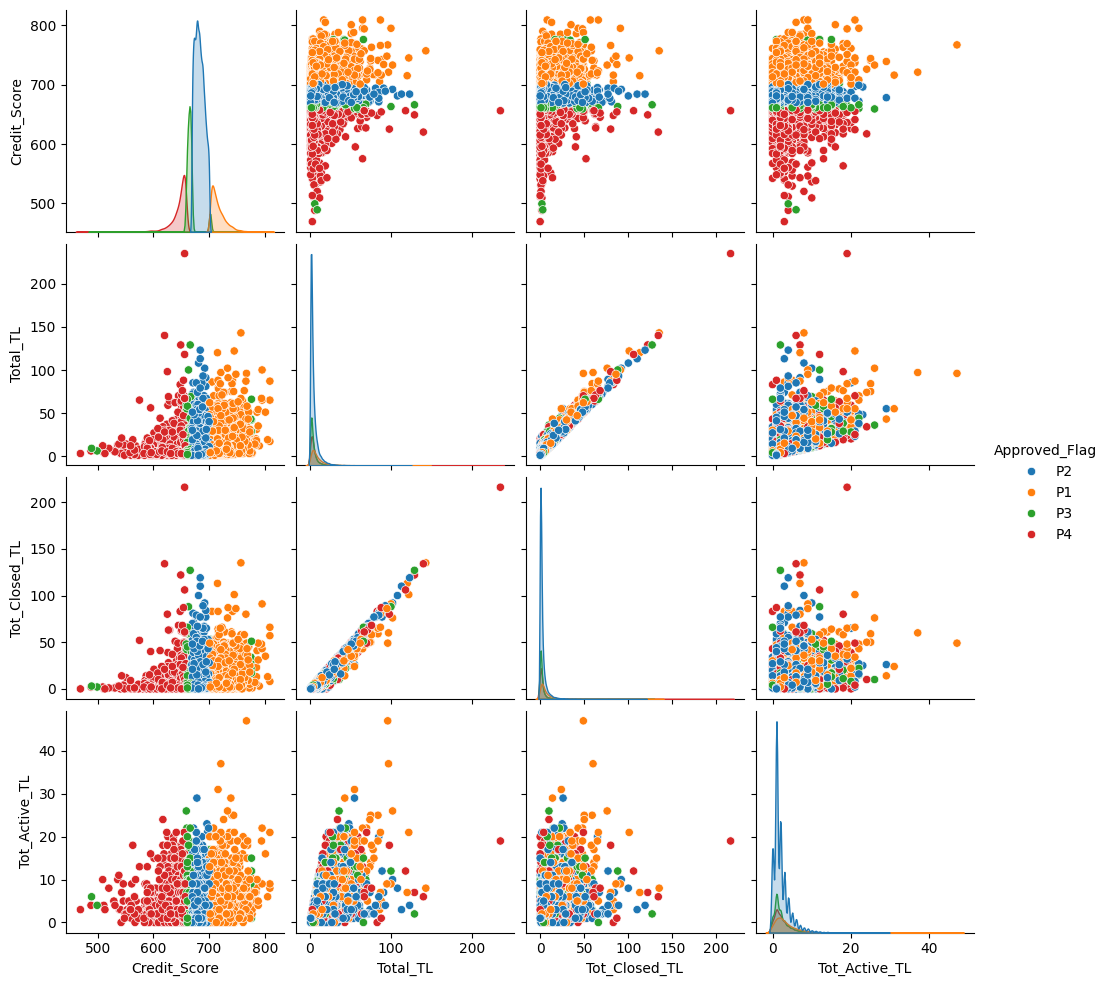

In [52]:

# Pairplot for a subset of features
subset_features = ['Credit_Score', 'Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL', 'Approved_Flag']
sns.pairplot(df[subset_features], hue='Approved_Flag')
plt.show()

## Preprocessing

In [53]:
# Feature scaling: Normalize numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [54]:
# Manually encode the Approved_Flag column
approved_flag_mapping = {'P1': 1, 'P2': 2, 'P3': 3, 'P4': 4}
df['Approved_Flag'] = df['Approved_Flag'].map(approved_flag_mapping)

In [55]:
# Encode remaining categorical features
categorical_features = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_features:
    df[col] = label_encoder.fit_transform(df[col])

In [56]:
df

,Unnamed: 0,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,-1.732010,-1.727892,-0.035236,0.168151,-0.538921,-0.587364,-0.462666,-0.643909,-0.463527,-1.030993,...,-0.554724,-0.298551,-0.532094,-0.284027,1.721790,-0.244895,4,4,0.788973,2
1,-1.731927,-1.727825,-0.571193,-0.483207,-0.538921,-0.587364,-0.462666,-0.643909,-0.463527,1.154169,...,-0.554724,-0.298551,-0.532094,-0.284027,-0.580791,-0.244895,2,2,0.268469,2
2,-1.731845,-1.727758,0.366731,-0.483207,2.372823,0.135419,-0.462666,-0.194333,-0.463527,1.154169,...,-0.554724,-0.298551,-0.532094,-0.284027,1.721790,-0.244895,2,5,0.647018,2
3,-1.731763,-1.727623,-0.303215,-0.157528,-0.538921,-0.587364,-0.462666,-0.643909,-0.463527,-0.667710,...,-0.554724,-0.298551,-0.532094,-0.284027,-0.580791,-0.244895,0,0,3.486130,1
4,-1.731680,-1.727555,0.098753,0.330990,-0.538921,-0.587364,-0.462666,-0.643909,-0.463527,-1.121131,...,1.976309,-0.298551,0.635540,-0.284027,1.721790,-0.244895,2,4,-0.535946,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42059,1.731680,1.730139,-0.303215,-0.483207,0.293006,0.135419,-0.462666,0.553761,-0.463527,1.154169,...,-0.554724,-0.298551,-0.532094,-0.284027,-0.580791,-0.244895,2,2,-1.387679,4
42060,1.731763,1.730206,-0.169226,-0.157528,-0.122958,-0.587364,0.481704,-0.643909,0.721561,-0.211558,...,-0.554724,-0.298551,-0.532094,-0.284027,-0.580791,-0.244895,5,5,1.072885,1
42061,1.731845,1.730273,-0.437204,-0.320367,-0.538921,0.135419,0.481704,1.154394,1.906649,-0.211558,...,1.976309,-0.298551,2.189664,-0.284027,-0.580791,-0.244895,2,5,-0.867175,3
42062,1.731927,1.730341,-0.437204,-0.320367,-0.538921,-0.587364,-0.462666,-0.643909,-0.463527,-0.211558,...,-0.554724,-0.298551,-0.532094,-0.284027,-0.580791,-0.244895,2,5,0.315788,2


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  42064 non-null  float64
 1   PROSPECTID                  42064 non-null  float64
 2   Total_TL                    42064 non-null  float64
 3   Tot_Closed_TL               42064 non-null  float64
 4   Tot_Active_TL               42064 non-null  float64
 5   Total_TL_opened_L6M         42064 non-null  float64
 6   Tot_TL_closed_L6M           42064 non-null  float64
 7   pct_tl_open_L6M             42064 non-null  float64
 8   pct_tl_closed_L6M           42064 non-null  float64
 9   pct_active_tl               42064 non-null  float64
 10  pct_closed_tl               42064 non-null  float64
 11  Total_TL_opened_L12M        42064 non-null  float64
 12  Tot_TL_closed_L12M          42064 non-null  float64
 13  pct_tl_open_L12M            420

In [58]:
df['Approved_Flag'].head()

0    2
1    2
2    2
3    1
4    3
Name: Approved_Flag, dtype: int64

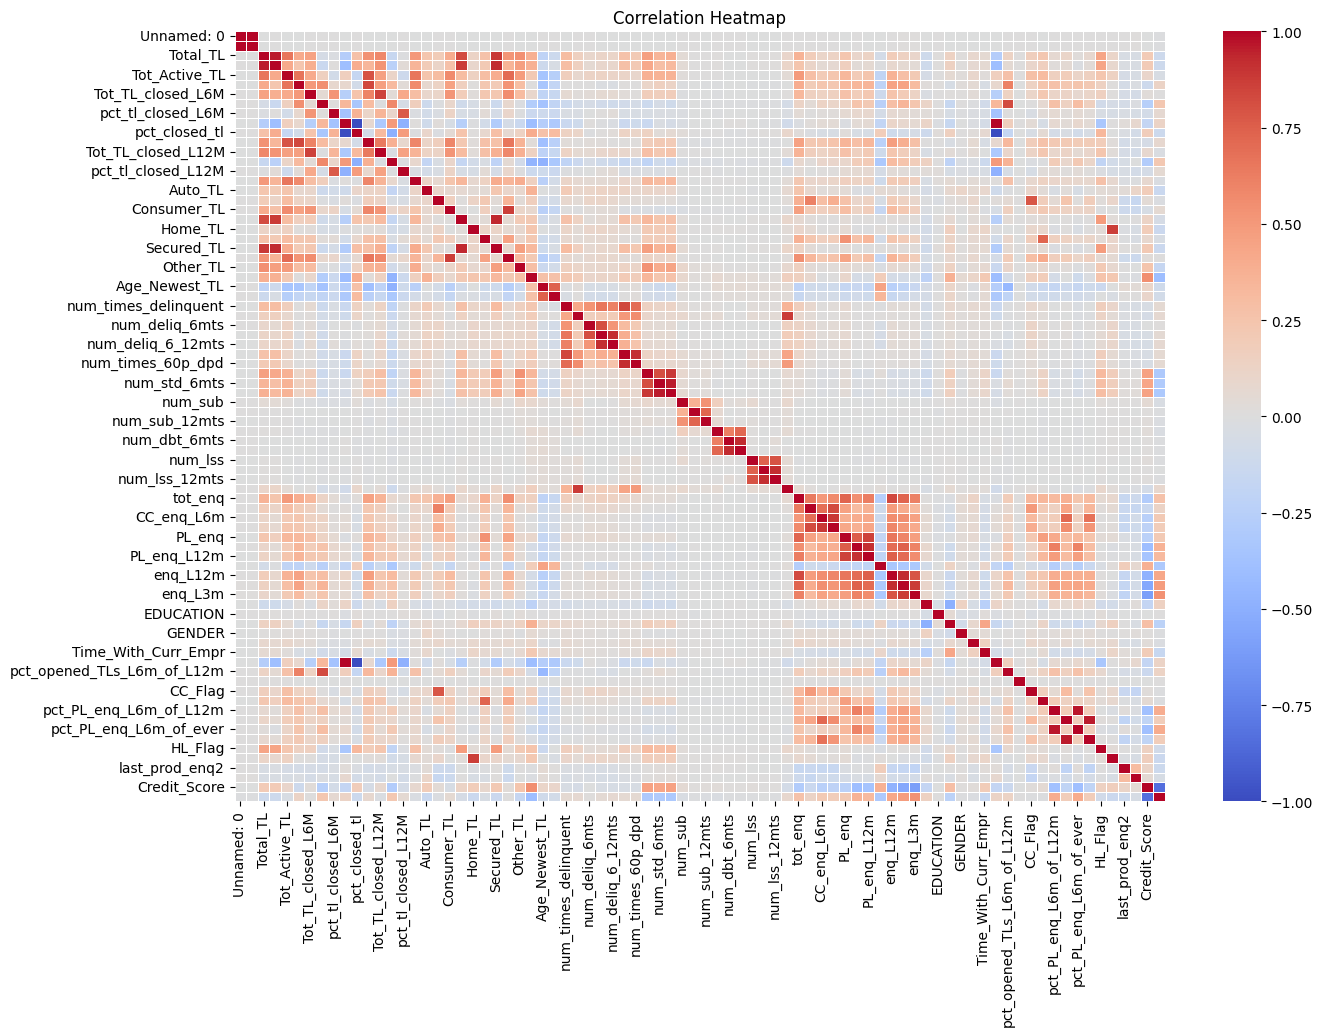

In [59]:
# Correlation Heatmap
plt.figure(figsize=(15, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## SMOTE

/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[Errno 2] No such file or directory: 'sysctl'
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py", line 270, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "/Users/dev02chandan/anaconda3/lib/python3.11/subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/dev02chandan/anaconda3/lib/python3.11/subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, pree

Approved_Flag
1    17895
2    17895
3    17895
4    17895
Name: count, dtype: int64


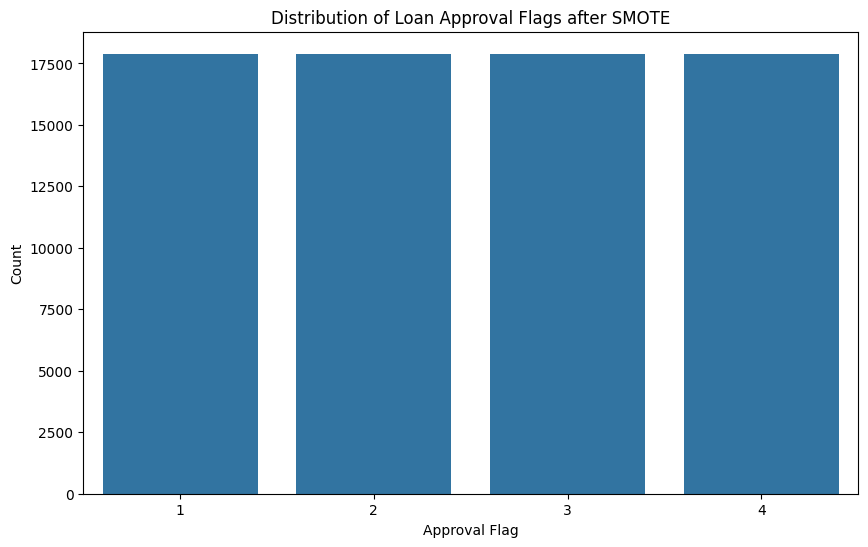

In [60]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop('Approved_Flag', axis=1)
y = df['Approved_Flag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Display the new class distribution
print(y_train_res.value_counts())

# Plotting to understand the new class distribution after SMOTE
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train_res)
plt.title('Distribution of Loan Approval Flags after SMOTE')
plt.xlabel('Approval Flag')
plt.ylabel('Count')
plt.show()

## Feature Selection

Approved_Flag             1.000000
Credit_Score              0.839861
enq_L3m                   0.535425
enq_L6m                   0.480408
enq_L12m                  0.428183
Age_Oldest_TL             0.404561
pct_PL_enq_L6m_of_ever    0.401189
pct_PL_enq_L6m_of_L12m    0.392635
PL_enq_L6m                0.359428
PL_enq_L12m               0.314367
num_std_12mts             0.313952
time_since_recent_enq     0.308924
num_std                   0.308891
num_std_6mts              0.295647
tot_enq                   0.264629
Name: Approved_Flag, dtype: float64


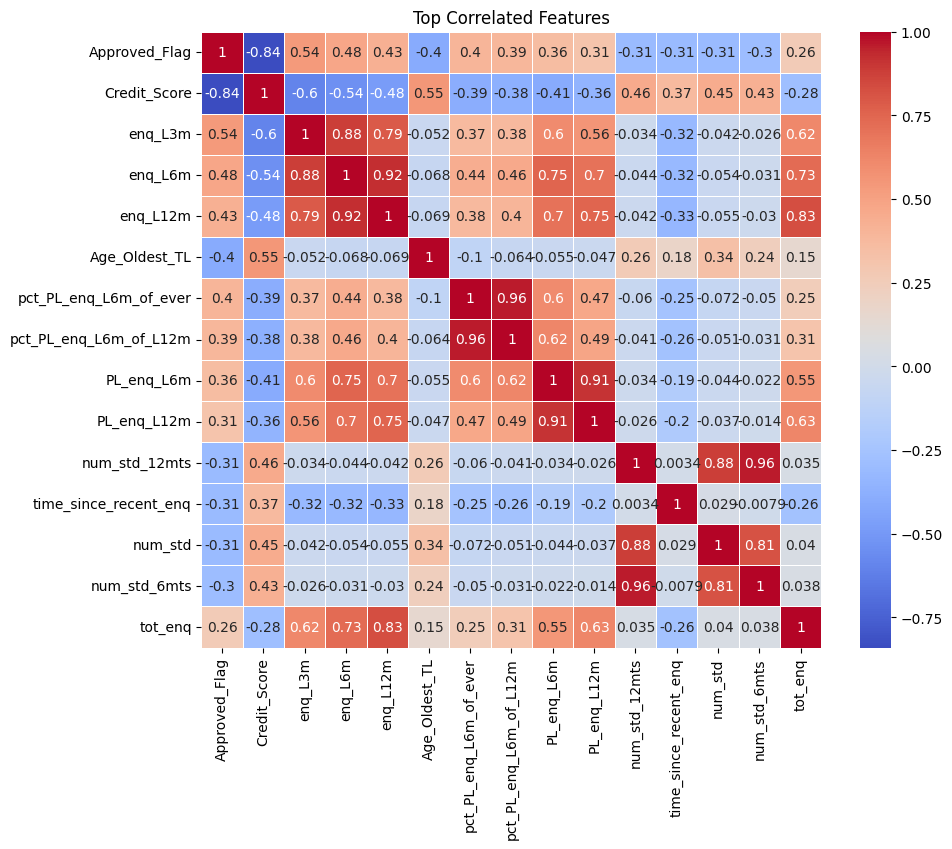

In [61]:
# Correlation matrix
corr_matrix = df.corr()

# Correlation with the target variable
corr_with_target = corr_matrix["Approved_Flag"].abs().sort_values(ascending=False)
print(corr_with_target.head(15))  # Display top 15 features

# Plotting the top correlated features
top_corr_features = corr_with_target.head(15).index
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Top Correlated Features')
plt.show()


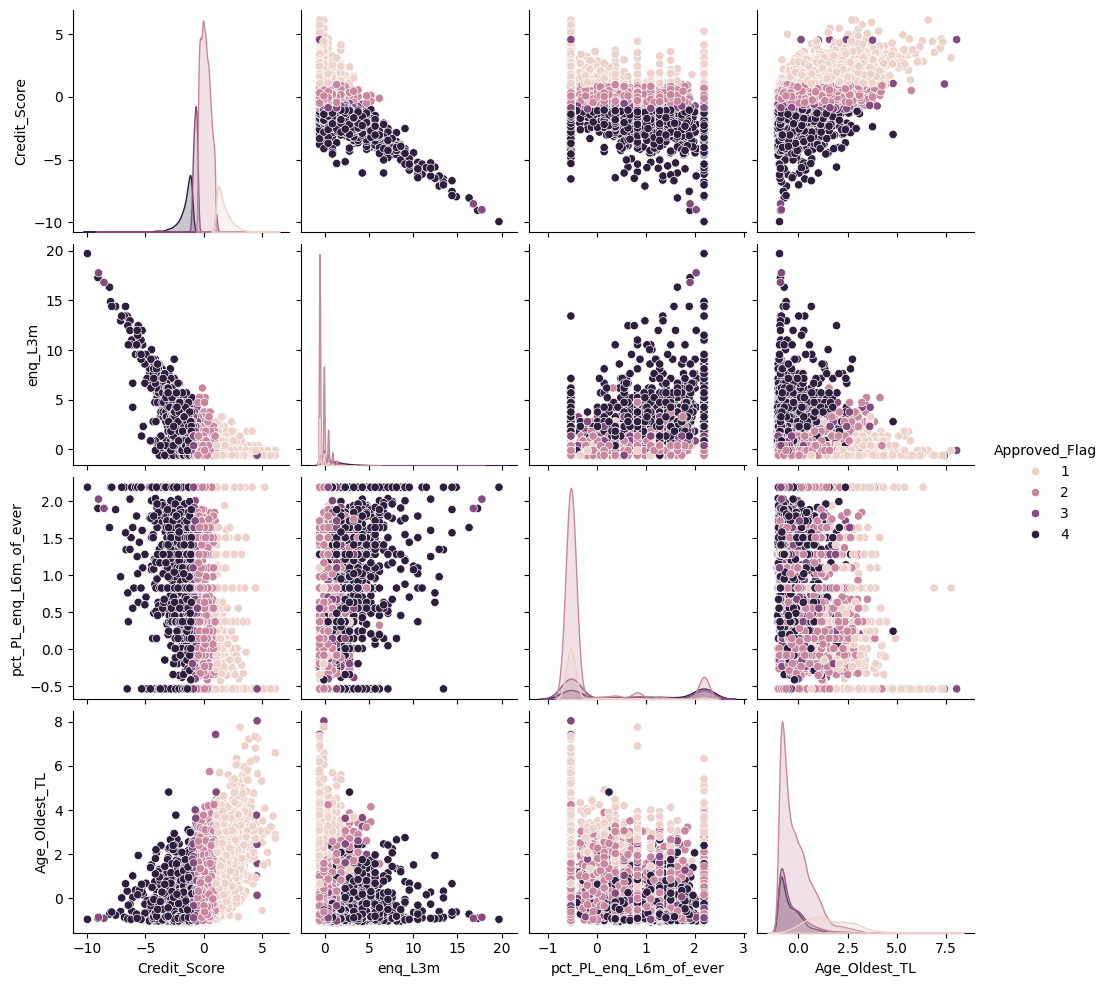

In [62]:
# Pairplot for a subset of features
subset_features = ['Credit_Score', 'enq_L3m', 'pct_PL_enq_L6m_of_ever', 'Age_Oldest_TL', 'Approved_Flag']
sns.pairplot(df[subset_features], hue='Approved_Flag')
plt.show()

Credit_Score                 0.401397
Age_Oldest_TL                0.073071
enq_L3m                      0.055826
enq_L6m                      0.033988
time_since_recent_enq        0.032957
num_std_12mts                0.027771
num_std                      0.020655
num_std_6mts                 0.020207
enq_L12m                     0.019728
pct_PL_enq_L6m_of_ever       0.015786
num_times_delinquent         0.015354
max_recent_level_of_deliq    0.014664
recent_level_of_deliq        0.013852
pct_PL_enq_L6m_of_L12m       0.013555
AGE                          0.011150
dtype: float64


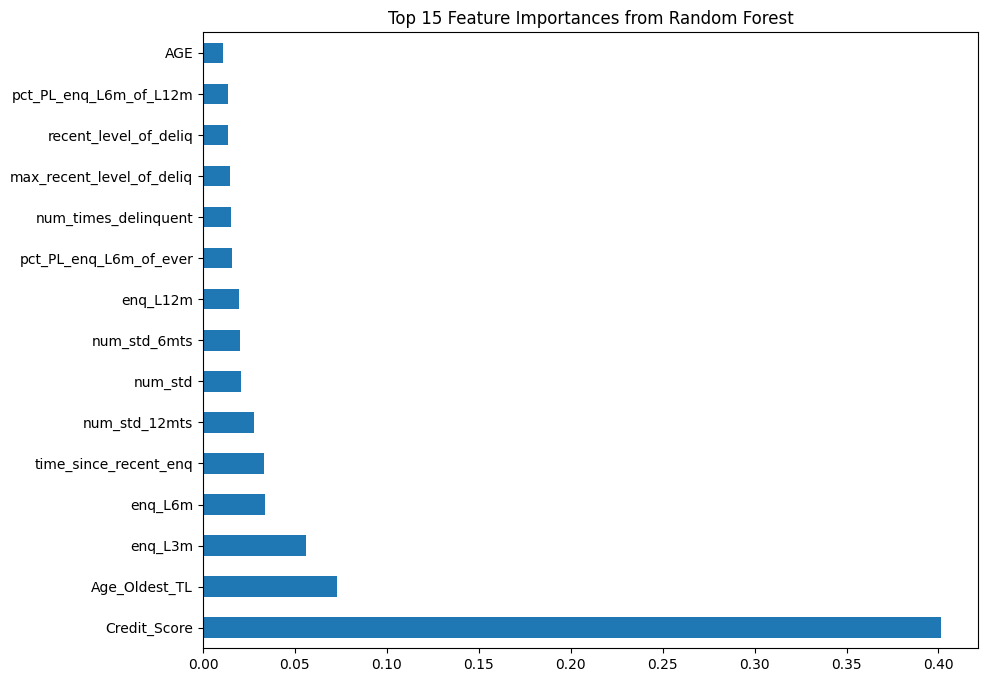

In [63]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model to get feature importances
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
top_features_rf = feature_importances.nlargest(15)
print(top_features_rf)

# Plotting feature importances
plt.figure(figsize=(10, 8))
top_features_rf.plot(kind='barh')
plt.title('Top 15 Feature Importances from Random Forest')
plt.show()


In [65]:
# Define feature sets
feature_set_1 = [
    'Credit_Score', 'enq_L3m', 'enq_L6m', 'enq_L12m', 'Age_Oldest_TL',
    'pct_PL_enq_L6m_of_ever', 'pct_PL_enq_L6m_of_L12m', 'PL_enq_L6m',
    'PL_enq_L12m', 'num_std_12mts', 'time_since_recent_enq', 'num_std'
]

feature_set_2 = [
    'Credit_Score', 'Age_Oldest_TL', 'enq_L3m', 'enq_L6m', 'time_since_recent_enq',
    'num_std_12mts', 'num_std', 'num_std_6mts', 'enq_L12m',
    'pct_PL_enq_L6m_of_ever', 'num_times_delinquent', 'max_recent_level_of_deliq',
    'recent_level_of_deliq'
]

feature_set_3 = [
    'Credit_Score', 'Age_Oldest_TL', 'enq_L3m', 'enq_L6m', 'time_since_recent_enq',
    'num_std_12mts', 'num_std', 'num_std_6mts', 'enq_L12m',
    'pct_PL_enq_L6m_of_ever', 'pct_PL_enq_L6m_of_L12m', 'PL_enq_L6m', 'PL_enq_L12m'
]

In [67]:
# Prepare datasets for each feature set
X_set_1 = df[feature_set_1]
X_set_2 = df[feature_set_2]
X_set_3 = df[feature_set_3]
y = df['Approved_Flag']


In [68]:
# Split the data into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_set_1, y, test_size=0.3, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_set_2, y, test_size=0.3, random_state=42)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_set_3, y, test_size=0.3, random_state=42)


In [69]:
# Display the shape of the datasets
print("Feature Set 1:", X_train_1.shape, X_test_1.shape)
print("Feature Set 2:", X_train_2.shape, X_test_2.shape)
print("Feature Set 3:", X_train_3.shape, X_test_3.shape)


Feature Set 1: (29444, 12) (12620, 12)
Feature Set 2: (29444, 13) (12620, 13)
Feature Set 3: (29444, 13) (12620, 13)


## Model Training

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb

In [82]:
# Define the models to be trained
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "MLP Classifier": MLPClassifier(max_iter=1000),
    "XGBoost": xgb.XGBClassifier(),
}

In [83]:

# Function to train and evaluate a model
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        return accuracy, precision, recall, f1
    except Exception as e:
        print(f"An error occurred while training {model}: {e}")
        return None, None, None, None

In [84]:
# Scaling the features
scaler = StandardScaler()
X_train_1 = scaler.fit_transform(X_train_1)
X_test_1 = scaler.transform(X_test_1)
X_train_2 = scaler.fit_transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)
X_train_3 = scaler.fit_transform(X_train_3)
X_test_3 = scaler.transform(X_test_3)

In [85]:
# Lists to store results
results_set_1 = []
results_set_2 = []
results_set_3 = []

In [80]:
# Adjust target labels to start from 0
y_adjusted = y - 1

In [81]:
# y values are now 0, 1, 2, 3 for best as 0 and worst as 3

In [86]:
# Train and evaluate models on each feature set
for name, model in models.items():
    acc_1, prec_1, rec_1, f1_1 = train_and_evaluate(model, X_train_1, y_train_1, X_test_1, y_test_1)
    acc_2, prec_2, rec_2, f1_2 = train_and_evaluate(model, X_train_2, y_train_2, X_test_2, y_test_2)
    acc_3, prec_3, rec_3, f1_3 = train_and_evaluate(model, X_train_3, y_train_3, X_test_3, y_test_3)
    results_set_1.append((name, acc_1, prec_1, rec_1, f1_1))
    results_set_2.append((name, acc_2, prec_2, rec_2, f1_2))
    results_set_3.append((name, acc_3, prec_3, rec_3, f1_3))

An error occurred while training XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...): Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]
An error occurred while training XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_by

In [87]:
# Display results
print("Results for Feature Set 1:")
for result in results_set_1:
    print(result)

print("\nResults for Feature Set 2:")
for result in results_set_2:
    print(result)

print("\nResults for Feature Set 3:")
for result in results_set_3:
    print(result)

Results for Feature Set 1:
('Logistic Regression', 0.9605388272583201, 0.9608560204658698, 0.9605388272583201, 0.9595745059918559)
('Random Forest', 0.9931854199683042, 0.993184862095087, 0.9931854199683042, 0.9931829038377972)
('Gradient Boosting', 0.9946909667194929, 0.9948231187314985, 0.9946909667194929, 0.9946780871758389)
('AdaBoost', 0.8782091917591125, 0.8097192013616885, 0.8782091917591125, 0.8343716035914885)
('Decision Tree', 0.993026941362916, 0.9930257019710904, 0.993026941362916, 0.9930248911440641)
('Support Vector Machine', 0.9717908082408875, 0.9718163478610815, 0.9717908082408875, 0.971286074175191)
('K-Nearest Neighbors', 0.9194928684627576, 0.917608752232327, 0.9194928684627576, 0.9180072050836827)
('Gaussian Naive Bayes', 0.7301901743264659, 0.7466924641638599, 0.7301901743264659, 0.7352168406756048)
('Linear Discriminant Analysis', 0.855229793977813, 0.8539340319034434, 0.855229793977813, 0.8497608953453468)
('Quadratic Discriminant Analysis', 0.7710776545166402, 

In [92]:
# Adjust target labels to start from 0 for XGBoost
y_adjusted = y - 1

# Split the data into training and testing sets with adjusted labels
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_set_1, y_adjusted, test_size=0.3, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_set_2, y_adjusted, test_size=0.3, random_state=42)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_set_3, y_adjusted, test_size=0.3, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_1 = scaler.fit_transform(X_train_1)
X_test_1 = scaler.transform(X_test_1)
X_train_2 = scaler.fit_transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)
X_train_3 = scaler.fit_transform(X_train_3)
X_test_3 = scaler.transform(X_test_3)

# Define the XGBoost model
xgb_model = xgb.XGBClassifier()

# Function to train and evaluate the XGBoost model
def train_and_evaluate_xgb(model, X_train, y_train, X_test, y_test):
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        return accuracy, precision, recall, f1
    except Exception as e:
        print(f"An error occurred while training {model}: {e}")
        return None, None, None, None

# Train and evaluate the XGBoost model on each feature set
acc_1, prec_1, rec_1, f1_1 = train_and_evaluate_xgb(xgb_model, X_train_1, y_train_1, X_test_1, y_test_1)
acc_2, prec_2, rec_2, f1_2 = train_and_evaluate_xgb(xgb_model, X_train_2, y_train_2, X_test_2, y_test_2)
acc_3, prec_3, rec_3, f1_3 = train_and_evaluate_xgb(xgb_model, X_train_3, y_train_3, X_test_3, y_test_3)

# Display results
print("Results for XGBoost on Feature Set 1:")
print(f"Accuracy: {acc_1}, Precision: {prec_1}, Recall: {rec_1}, F1-Score: {f1_1}")

print("\nResults for XGBoost on Feature Set 2:")
print(f"Accuracy: {acc_2}, Precision: {prec_2}, Recall: {rec_2}, F1-Score: {f1_2}")

print("\nResults for XGBoost on Feature Set 3:")
print(f"Accuracy: {acc_3}, Precision: {prec_3}, Recall: {rec_3}, F1-Score: {f1_3}")


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Results for XGBoost on Feature Set 1:
Accuracy: 0.9929477020602219, Precision: 0.9929537612689822, Recall: 0.9929477020602219, F1-Score: 0.9929426518653185

Results for XGBoost on Feature Set 2:
Accuracy: 0.9933438985736925, Precision: 0.9933544937240267, Recall: 0.9933438985736925, F1-Score: 0.9933383420051676

Results for XGBoost on Feature Set 3:
Accuracy: 0.9929477020602219, Precision: 0.9929516384832013, Recall: 0.9929477020602219, F1-Score: 0.9929432039164695


## Saving the models

In [93]:
import joblib

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_set_2, y_adjusted, test_size=0.3, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_2 = scaler.fit_transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)

# Train Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train_2, y_train_2)

# Train XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_2, y_train_2)

# Evaluate models (optional)
y_pred_gb = gradient_boosting_model.predict(X_test_2)
y_pred_xgb = xgb_model.predict(X_test_2)

print("Gradient Boosting Model")
print(f"Accuracy: {accuracy_score(y_test_2, y_pred_gb)}")
print(f"Precision: {precision_score(y_test_2, y_pred_gb, average='weighted', zero_division=0)}")
print(f"Recall: {recall_score(y_test_2, y_pred_gb, average='weighted', zero_division=0)}")
print(f"F1-Score: {f1_score(y_test_2, y_pred_gb, average='weighted', zero_division=0)}")

print("\nXGBoost Model")
print(f"Accuracy: {accuracy_score(y_test_2, y_pred_xgb)}")
print(f"Precision: {precision_score(y_test_2, y_pred_xgb, average='weighted', zero_division=0)}")
print(f"Recall: {recall_score(y_test_2, y_pred_xgb, average='weighted', zero_division=0)}")
print(f"F1-Score: {f1_score(y_test_2, y_pred_xgb, average='weighted', zero_division=0)}")

# Save the Gradient Boosting model
joblib.dump(gradient_boosting_model, 'gradient_boosting_model.joblib')

# Save the XGBoost model
joblib.dump(xgb_model, 'xgb_model.joblib')

print("Models saved successfully!")

/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Gradient Boosting Model
Accuracy: 0.9946909667194929
Precision: 0.9948135186735959
Recall: 0.9946909667194929
F1-Score: 0.9946785758766191

XGBoost Model
Accuracy: 0.9933438985736925
Precision: 0.9933544937240267
Recall: 0.9933438985736925
F1-Score: 0.9933383420051676
Models saved successfully!


## Understanding Feature Importance

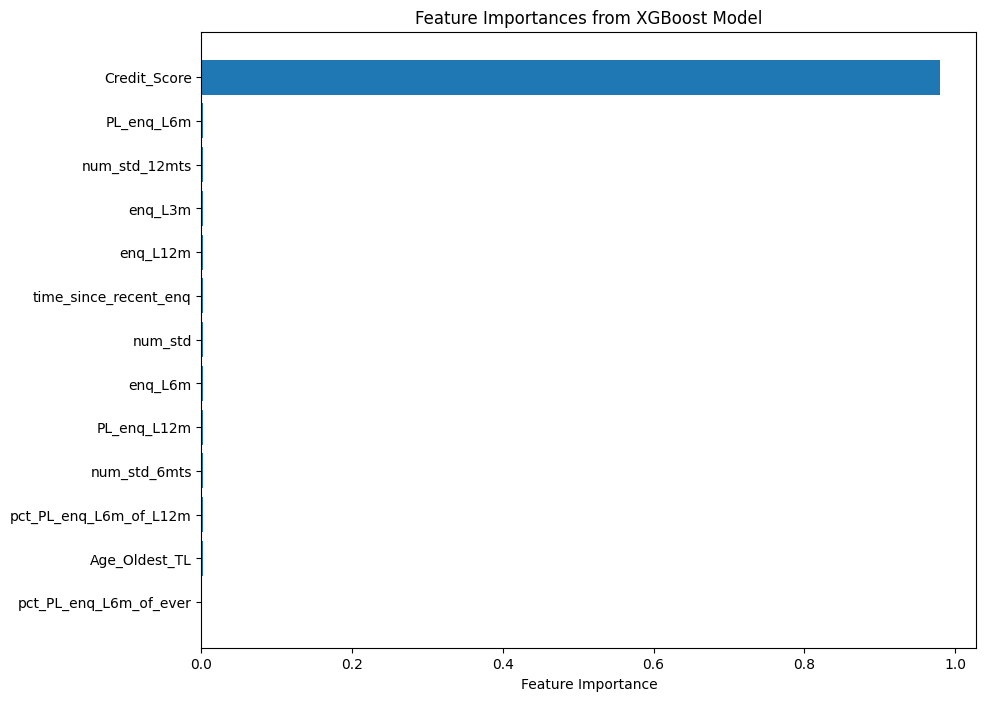

In [96]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Assuming xgb_model is your trained XGBoost model

# Get feature importances
feature_importances = xgb_model.feature_importances_
features = [
    'Credit_Score', 'Age_Oldest_TL', 'enq_L3m', 'enq_L6m', 
    'time_since_recent_enq', 'num_std_12mts', 'num_std', 'num_std_6mts', 
    'enq_L12m', 'pct_PL_enq_L6m_of_ever', 'pct_PL_enq_L6m_of_L12m', 
    'PL_enq_L6m', 'PL_enq_L12m'
]

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importances from XGBoost Model')
plt.gca().invert_yaxis()
plt.show()


## Without Credit score 

/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Model Performance without Credit Score:
Accuracy: 0.7316957210776546
Precision: 0.7016626522296323
Recall: 0.7316957210776546
F1-Score: 0.7054175052596371


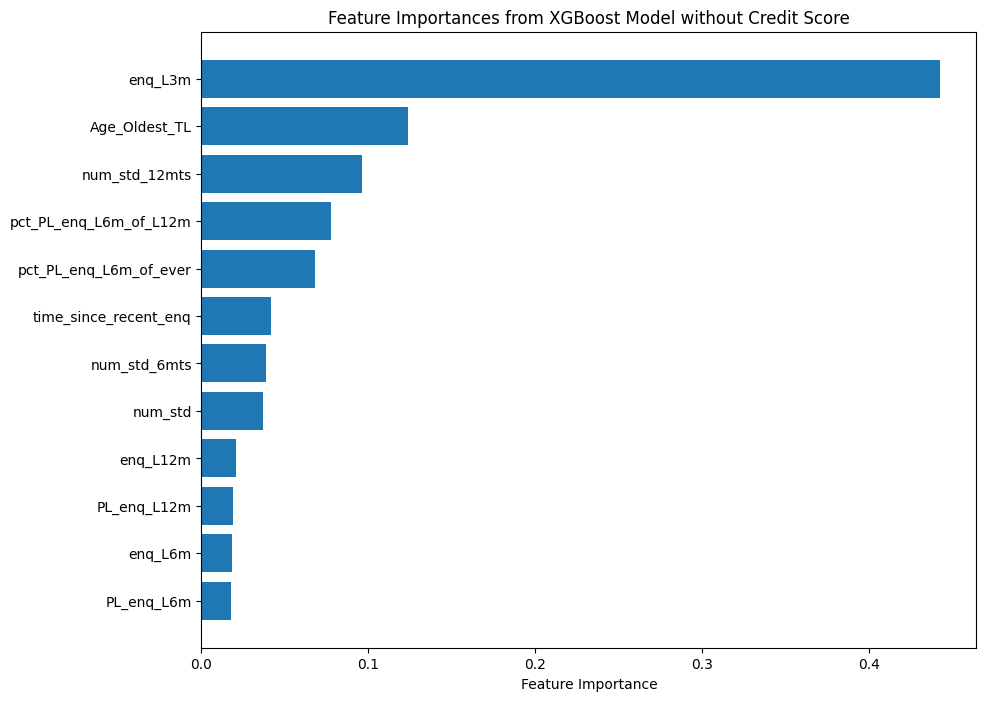

In [97]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd

# Define features without Credit_Score
features_without_credit_score = [
    'Age_Oldest_TL', 'enq_L3m', 'enq_L6m', 'time_since_recent_enq', 
    'num_std_12mts', 'num_std', 'num_std_6mts', 'enq_L12m', 
    'pct_PL_enq_L6m_of_ever', 'pct_PL_enq_L6m_of_L12m', 
    'PL_enq_L6m', 'PL_enq_L12m'
]

# Prepare the dataset without Credit_Score
X_set_no_credit = df[features_without_credit_score]
y_adjusted = df['Approved_Flag'] - 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_set_no_credit, y_adjusted, test_size=0.3, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train XGBoost model without Credit_Score
xgb_model_no_credit = xgb.XGBClassifier()
xgb_model_no_credit.fit(X_train, y_train)

# Evaluate the model
y_pred = xgb_model_no_credit.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("Model Performance without Credit Score:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Get feature importances
feature_importances = xgb_model_no_credit.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': features_without_credit_score,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importances from XGBoost Model without Credit Score')
plt.gca().invert_yaxis()
plt.show()


## Hyperparameter tuning and Ensemble

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import VotingClassifier

# Define the parameter grids for each model
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Initialize the models
xgb_model = xgb.XGBClassifier()
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()

# Initialize Grid Searches
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit Grid Searches
grid_search_xgb.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)
grid_search_gb.fit(X_train, y_train)

# Get the best models and parameters
best_xgb = grid_search_xgb.best_estimator_
best_rf = grid_search_rf.best_estimator_
best_gb = grid_search_gb.best_estimator_

print(f"Best XGBoost Parameters: {grid_search_xgb.best_params_}")
print(f"Best RandomForest Parameters: {grid_search_rf.best_params_}")
print(f"Best GradientBoosting Parameters: {grid_search_gb.best_params_}")

# Evaluate the best models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    return accuracy, precision, recall, f1

acc_xgb, prec_xgb, rec_xgb, f1_xgb = evaluate_model(best_xgb, X_test, y_test)
acc_rf, prec_rf, rec_rf, f1_rf = evaluate_model(best_rf, X_test, y_test)
acc_gb, prec_gb, rec_gb, f1_gb = evaluate_model(best_gb, X_test, y_test)

print(f"XGBoost - Accuracy: {acc_xgb}, Precision: {prec_xgb}, Recall: {rec_xgb}, F1-Score: {f1_xgb}")
print(f"RandomForest - Accuracy: {acc_rf}, Precision: {prec_rf}, Recall: {rec_rf}, F1-Score: {f1_rf}")
print(f"GradientBoosting - Accuracy: {acc_gb}, Precision: {prec_gb}, Recall: {rec_gb}, F1-Score: {f1_gb}")

# Create an ensemble of the best models
voting_model = VotingClassifier(estimators=[
    ('xgb', best_xgb),
    ('rf', best_rf),
    ('gb', best_gb)
], voting='soft')

# Train the voting classifier
voting_model.fit(X_train, y_train)

# Evaluate the voting classifier
acc_voting, prec_voting, rec_voting, f1_voting = evaluate_model(voting_model, X_test, y_test)

print(f"Voting Classifier - Accuracy: {acc_voting}, Precision: {prec_voting}, Recall: {rec_voting}, F1-Score: {f1_voting}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will b

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.9s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will b

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.0s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   2.0s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   2.1s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   3.2s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   1.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   1.8s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   4.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   2.0s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   4.0s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will b

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   2.8s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   2.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   3.0s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will b

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.8; total time=   2.2s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   5.1s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   5.1s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will b

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   5.2s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   3.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   3.4s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will b

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   3.8s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.9s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.7s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.7s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.8s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   7.1s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   7.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.5s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.4s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.9s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.7s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   7.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   7.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   7.2s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   7.2s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   2.8s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   2.9s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.0s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   2.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.0s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will b

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.0s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   2.1s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   1.8s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   2.4s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   2.4s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   4.3s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   4.3s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   3.8s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=1.0; total time=   2.1s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will b

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=1.0; total time=   1.8s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   3.1s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   3.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   3.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   3.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   3.2s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   3.2s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.8s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=1.0; total time=   1.0s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.8s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   6.7s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   7.3s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.1s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   5.9s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.1s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will b

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   6.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   6.1s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   6.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.4s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8; total time=   1.0s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   2.7s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   2.6s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   3.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   3.0s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.0s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.2s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   2.2s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   2.4s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   2.6s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.8; total time=   1.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.8; total time=   1.8s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   4.9s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   4.8s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   3.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=1.0; total time=   1.5s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will b

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   3.9s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=1.0; total time=   1.6s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   3.1s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will b

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   2.8s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.8s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.0s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.7s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.8s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   6.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   6.3s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.1s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   5.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   5.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   5.6s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.5s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   6.3s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   3.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   3.3s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   2.2s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   6.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   6.4s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   6.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   6.4s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.6s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   3.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   2.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   3.6s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   3.2s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.8; total time=   2.8s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   6.1s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   7.1s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.8; total time=   3.1s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   6.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   3.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   6.8s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   6.9s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   7.6s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   3.8s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   3.5s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   5.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   6.4s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will b

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   5.4s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.9s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.8s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.7s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.8s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   8.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.8s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.9s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   8.8s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.6s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.5s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   7.2s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   7.6s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   7.8s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   7.9s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   2.8s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   3.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   3.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   1.4s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will b

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   2.8s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   3.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   1.4s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.5s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.5s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   2.6s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   2.4s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   2.3s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   2.5s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.8; total time=   2.0s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.8; total time=   2.0s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   4.9s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   5.2s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   4.4s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   5.4s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=1.0; total time=   2.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=1.0; total time=   2.4s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=1.0; total time=   2.5s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   3.9s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   4.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   4.3s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   3.8s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   4.1s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.8s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.7s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.8s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   7.2s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   7.7s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.5s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   6.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.4s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   7.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   7.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   6.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.4s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will b

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8; total time=   1.1s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8; total time=   1.3s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will b

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   3.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   3.0s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.0s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=1.0; total time=   1.1s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   2.4s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will b

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   2.5s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   2.8s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.8; total time=   2.1s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.8; total time=   3.0s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   7.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   7.0s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.8; total time=   4.9s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=1.0; total time=   4.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   7.9s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   7.9s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   8.1s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will b

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   8.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=1.0; total time=   3.0s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   3.4s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   3.3s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   7.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   5.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   5.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   5.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   6.1s


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   4.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   9.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   4.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   9.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  10.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   5.0s
[CV] END m

In [100]:
from sklearn.preprocessing import PolynomialFeatures

# Create interaction and polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train and evaluate the models with the new features
xgb_model_poly = xgb.XGBClassifier(**grid_search_xgb.best_params_)
rf_model_poly = RandomForestClassifier(**grid_search_rf.best_params_)
gb_model_poly = GradientBoostingClassifier(**grid_search_gb.best_params_)

xgb_model_poly.fit(X_train_poly, y_train)
rf_model_poly.fit(X_train_poly, y_train)
gb_model_poly.fit(X_train_poly, y_train)

# Evaluate the models with the new features
acc_xgb_poly, prec_xgb_poly, rec_xgb_poly, f1_xgb_poly = evaluate_model(xgb_model_poly, X_test_poly, y_test)
acc_rf_poly, prec_rf_poly, rec_rf_poly, f1_rf_poly = evaluate_model(rf_model_poly, X_test_poly, y_test)
acc_gb_poly, prec_gb_poly, rec_gb_poly, f1_gb_poly = evaluate_model(gb_model_poly, X_test_poly, y_test)

print(f"XGBoost (Poly) - Accuracy: {acc_xgb_poly}, Precision: {prec_xgb_poly}, Recall: {rec_xgb_poly}, F1-Score: {f1_xgb_poly}")
print(f"RandomForest (Poly) - Accuracy: {acc_rf_poly}, Precision: {prec_rf_poly}, Recall: {rec_rf_poly}, F1-Score: {f1_rf_poly}")
print(f"GradientBoosting (Poly) - Accuracy: {acc_gb_poly}, Precision: {prec_gb_poly}, Recall: {rec_gb_poly}, F1-Score: {f1_gb_poly}")


/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


XGBoost (Poly) - Accuracy: 0.7366085578446909, Precision: 0.7064327230393326, Recall: 0.7366085578446909, F1-Score: 0.7085700127358587
RandomForest (Poly) - Accuracy: 0.7359746434231379, Precision: 0.7038488877681376, Recall: 0.7359746434231379, F1-Score: 0.7029347503529967
GradientBoosting (Poly) - Accuracy: 0.7359746434231379, Precision: 0.7043519286252449, Recall: 0.7359746434231379, F1-Score: 0.7078615922028219


In [101]:
from sklearn.linear_model import LogisticRegression

# Create meta-features (predictions of the base models)
meta_features_train = pd.DataFrame({
    'xgb': xgb_model_poly.predict(X_train_poly),
    'rf': rf_model_poly.predict(X_train_poly),
    'gb': gb_model_poly.predict(X_train_poly)
})

meta_features_test = pd.DataFrame({
    'xgb': xgb_model_poly.predict(X_test_poly),
    'rf': rf_model_poly.predict(X_test_poly),
    'gb': gb_model_poly.predict(X_test_poly)
})

# Train a meta-model on the predictions of the base models
meta_model = LogisticRegression()
meta_model.fit(meta_features_train, y_train)

# Evaluate the meta-model
y_pred_meta = meta_model.predict(meta_features_test)
acc_meta = accuracy_score(y_test, y_pred_meta)
prec_meta = precision_score(y_test, y_pred_meta, average='weighted', zero_division=0)
rec_meta = recall_score(y_test, y_pred_meta, average='weighted', zero_division=0)
f1_meta = f1_score(y_test, y_pred_meta, average='weighted', zero_division=0)

print(f"Stacked Model - Accuracy: {acc_meta}, Precision: {prec_meta}, Recall: {rec_meta}, F1-Score: {f1_meta}")


Stacked Model - Accuracy: 0.7359746434231379, Precision: 0.7035149877763114, Recall: 0.7359746434231379, F1-Score: 0.7020353504410769


## Without Credit Score
Our aim is to prove that credit lending should solely not depend on the credit score. 
There are other factors that can influence the decision. 

In [102]:
import joblib
import xgboost as xgb
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Define the best hyperparameters
best_params = {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

# Prepare the dataset (assuming `df` is your DataFrame and `y` is the target)
X = df[[
    'Age_Oldest_TL', 'enq_L3m', 'enq_L6m', 'time_since_recent_enq', 
    'num_std_12mts', 'num_std', 'num_std_6mts', 'enq_L12m', 
    'pct_PL_enq_L6m_of_ever', 'pct_PL_enq_L6m_of_L12m', 
    'PL_enq_L6m', 'PL_enq_L12m'
]]
y_adjusted = df['Approved_Flag'] - 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_adjusted, test_size=0.3, random_state=42)

# Generate polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the XGBoost model with the best hyperparameters
xgb_model_poly = xgb.XGBClassifier(**best_params)
xgb_model_poly.fit(X_train_poly, y_train)

# Save the model
joblib.dump(xgb_model_poly, 'xgb_model_poly.joblib')

print("Model saved successfully!")

/Users/dev02chandan/Documents/Intern@MatiriAI/Credit Risk Modelling/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Model saved successfully!


## Conclusion

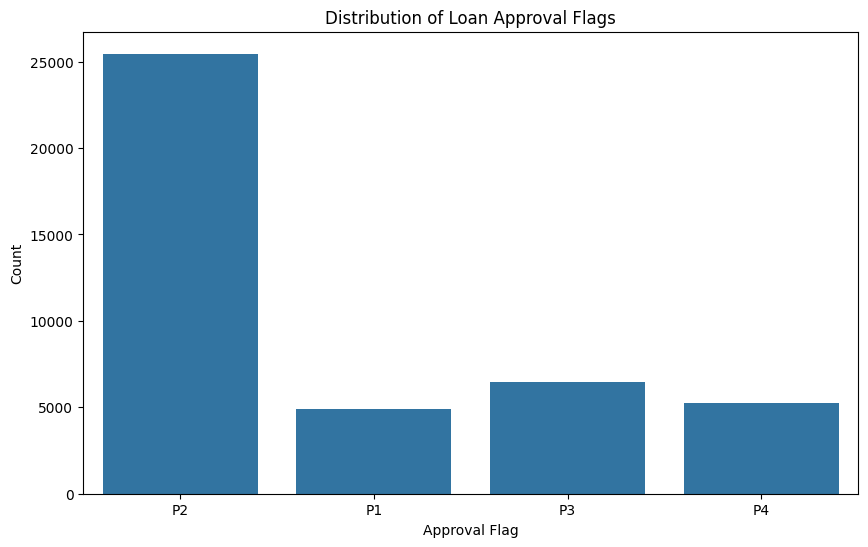

Future: Understanding each P1, P2, P3, P4. Outliers, minimum deviation

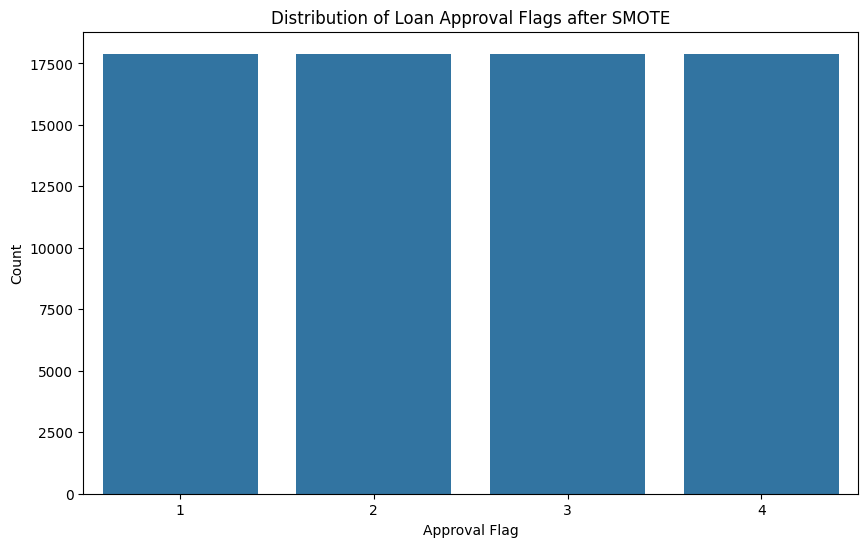

Approved_Flag             1.000000
Credit_Score              0.839861
enq_L3m                   0.535425
enq_L6m                   0.480408
enq_L12m                  0.428183
Age_Oldest_TL             0.404561
pct_PL_enq_L6m_of_ever    0.401189
pct_PL_enq_L6m_of_L12m    0.392635
PL_enq_L6m                0.359428
PL_enq_L12m               0.314367
num_std_12mts             0.313952
time_since_recent_enq     0.308924
num_std                   0.308891
num_std_6mts              0.295647
tot_enq                   0.264629
Name: Approved_Flag, dtype: float64

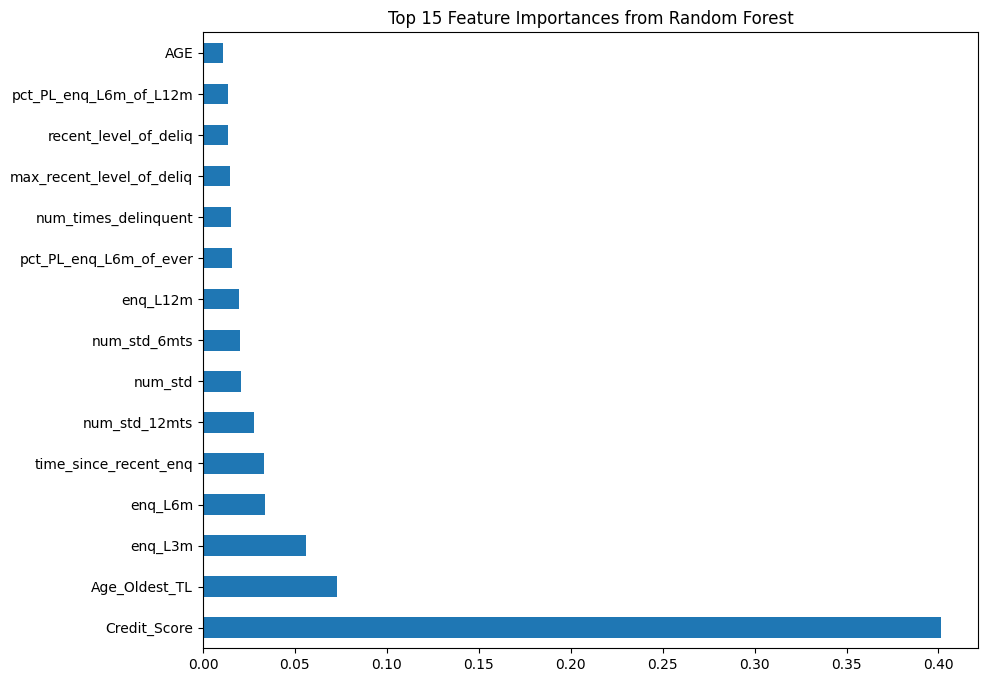

Results for XGBoost on Feature Set 1:
Accuracy: 0.9929477020602219, Precision: 0.9929537612689822, Recall: 0.9929477020602219, F1-Score: 0.9929426518653185

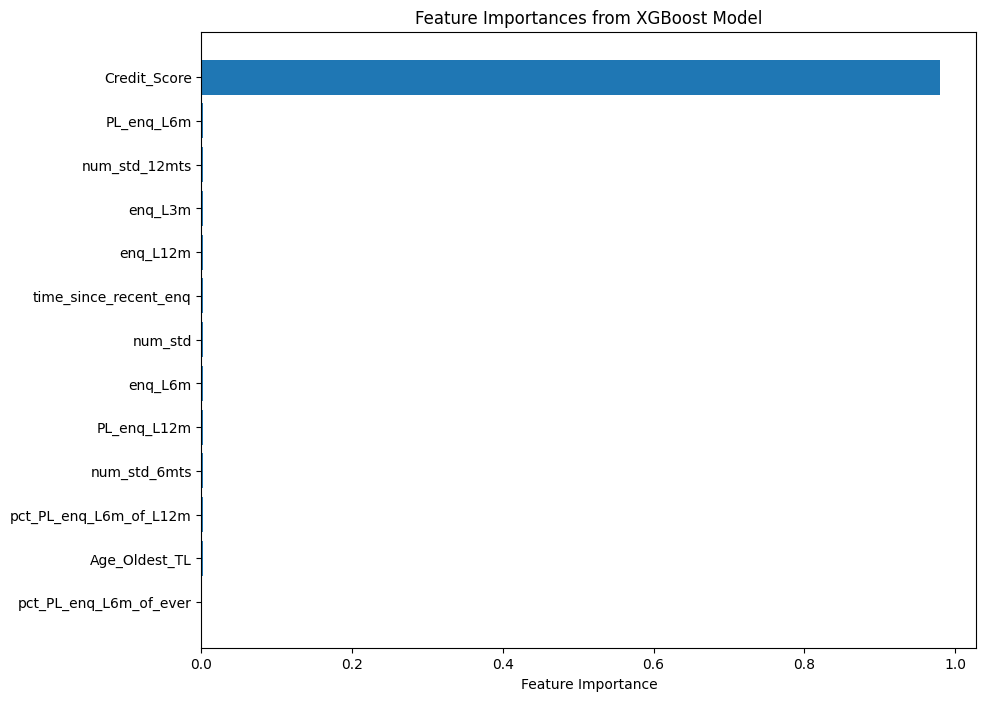

Credit score table, flag and credit score
Credit score 

Bank data

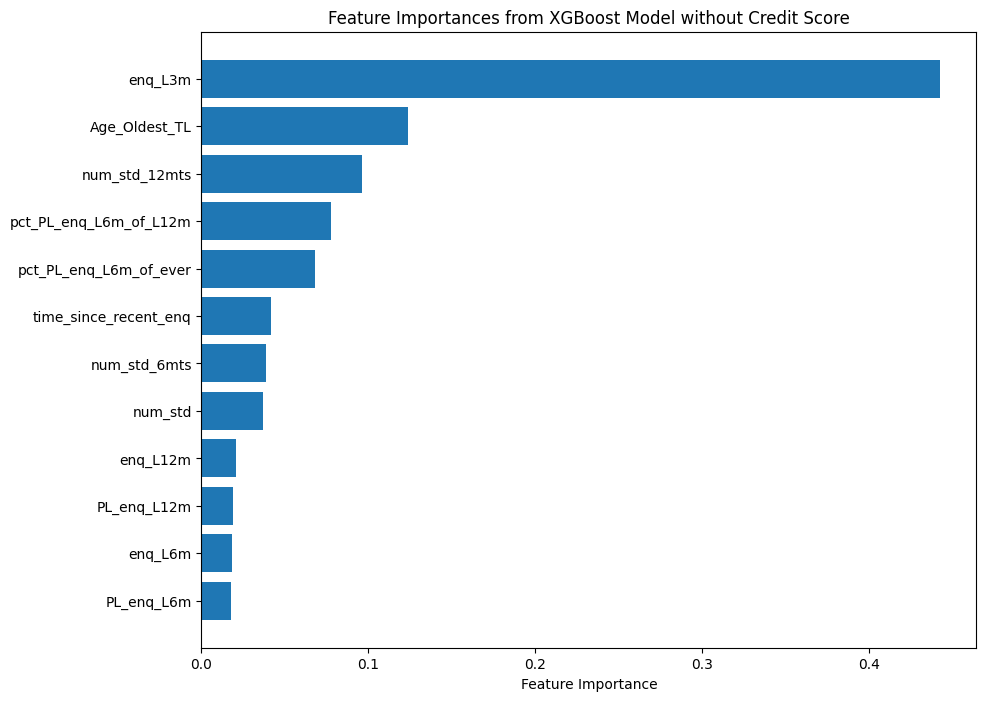

XGBoost - Accuracy: 0.7383518225039619, Precision: 0.7089772870005039, Recall: 0.7383518225039619, F1-Score: 0.7091571769974139